In [83]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

In [84]:
df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [85]:
#checking data types
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [86]:
#checking missing values 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cnt,0,0.0
weekday,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0
mnth,0,0.0
hr,0,0.0
holiday,0,0.0
workingday,0,0.0
registered,0,0.0


In [87]:
df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

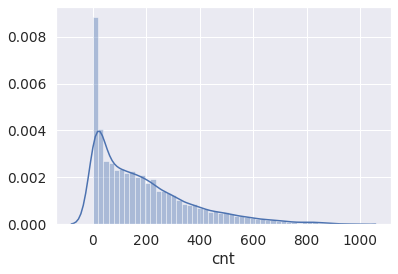

In [88]:
sns.distplot(df['cnt']);

In [89]:
print("Skewness: %f" % df['cnt'].skew())
print("Kurtosis: %f" % df['cnt'].kurt())

Skewness: 1.277412
Kurtosis: 1.417203


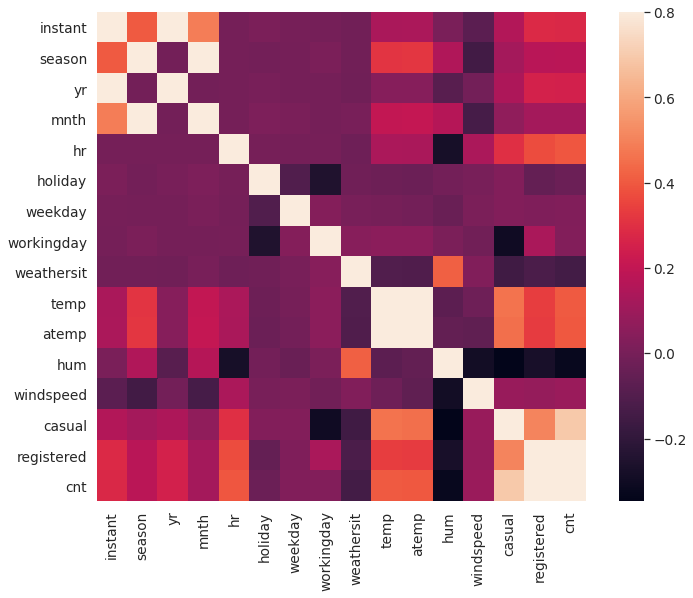

In [90]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

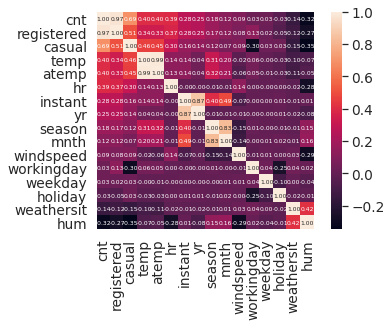

In [91]:
k = 17
cols = corrmat.nlargest(k, 'cnt')['cnt'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [92]:
print(df.shape)

(17379, 17)


In [93]:
#df = df.drop(columns = ["temp"])
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


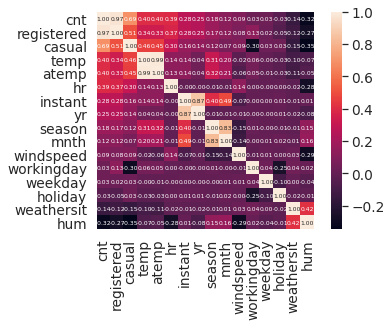

In [94]:
k = 16
cols = corrmat.nlargest(k, 'cnt')['cnt'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [95]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [96]:
df["cnt"]

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [97]:
no_riders = tuple(range(0))
low = tuple(range(1, 50, 1))
med = tuple(range(50, 600, 1))
high = tuple(range(600, 1000000, 1))
# Defineing peramiters names
def filter_riders(platform):
    if platform in no_riders:
        return '0'
    elif platform in low:
        return '1'
    elif platform in med:
        return '2'
    else:
        return '3'

In [98]:
df['cnt'].apply(filter_riders)
df['riders'] = df['cnt'].apply(filter_riders)
df = df.drop(columns = ["cnt"])
df = df.drop(columns = ["registered"])
df = df.drop(columns = ["casual"])
df = df.drop(columns = ["dteday"])

In [99]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'riders'],
      dtype='object')

In [100]:
df.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
riders         object
dtype: object

In [126]:
# Defining Data into X1,y1
X1 = np.array(df.iloc[:,0:13])
y1 = np.array(df['riders'])

In [127]:
df['riders'].value_counts()

2    11891
1     4821
3      667
Name: riders, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size= 0.3, random_state =42)

In [129]:
# Decision Tree Classifier 1
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf1 = DecisionTreeClassifier().fit(X1_train, y1_train)
print('Accuracy of Decision tree 1 classifier on training set: {:.2f}'.format(clf1.score(X1_train, y1_train)))
print('Accuracy of Decision tree 1 classifier on test set: {:.2f}' .format(clf1.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of Decision tree 1 classifier on training set: 1.00
Accuracy of Decision tree 1 classifier on test set: 0.93
Time 1.3057142496109008e-08


In [130]:
# Decision Tree Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = clf1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1290  150    0]
 [ 121 3429   44]
 [   0   39  141]]
              precision    recall  f1-score   support

           1       0.91      0.90      0.90      1440
           2       0.95      0.95      0.95      3594
           3       0.76      0.78      0.77       180

    accuracy                           0.93      5214
   macro avg       0.87      0.88      0.88      5214
weighted avg       0.93      0.93      0.93      5214



In [131]:
# KNN 1
# Takes a long time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)
print('Accuracy of K-NN 1 classifier on training set: {:.2f}'.format(knn1.score(X1_train,y1_train)))
print('Accuracy of K-NN 1 classifier on test set: {:.2f}'.format(knn1.score(X1_test,y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of K-NN 1 classifier on training set: 0.90
Accuracy of K-NN 1 classifier on test set: 0.81
Time 1.4659017324447632e-08


In [132]:
# KNN Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = knn1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1005  435    0]
 [ 392 3180   22]
 [   2  154   24]]
              precision    recall  f1-score   support

           1       0.72      0.70      0.71      1440
           2       0.84      0.88      0.86      3594
           3       0.52      0.13      0.21       180

    accuracy                           0.81      5214
   macro avg       0.69      0.57      0.59      5214
weighted avg       0.80      0.81      0.80      5214



In [133]:
# SVM 1
from sklearn.svm import SVC
svm1= SVC(gamma= 'scale')
svm1.fit(X1_train, y1_train)
print('Accuracy of SVM 1 classifier on training set: {:.2f}'.format(svm1.score(X1_train, y1_train)))
print('Accuracy of SVM 1 classifier on test set: {:.2f}'.format(svm1.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of SVM 1 classifier on training set: 0.68
Accuracy of SVM 1 classifier on test set: 0.69
Time 1.535750925540924e-08


In [134]:
# SVM Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = svm1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[   0 1440    0]
 [   0 3594    0]
 [   0  180    0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1440
           2       0.69      1.00      0.82      3594
           3       0.00      0.00      0.00       180

    accuracy                           0.69      5214
   macro avg       0.23      0.33      0.27      5214
weighted avg       0.48      0.69      0.56      5214



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
# Naive Bayes 1
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X1_train, y1_train).predict(X1_test)
print('Accuracy of naive_bayes classifier on training set: {:.2f}'.format(gnb.score(X1_train, y1_train)))
print('Accuracy of naive_bayes classifier on test set: {:.2f}'.format(gnb.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of naive_bayes classifier on training set: 0.71
Accuracy of naive_bayes classifier on test set: 0.71
Time 2.4437904357910155e-08


In [136]:
# Naive Bayes Classification and Confusion matrix
pred1 = gnb.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1070  363    7]
 [ 496 2501  597]
 [   0   68  112]]
              precision    recall  f1-score   support

           1       0.68      0.74      0.71      1440
           2       0.85      0.70      0.77      3594
           3       0.16      0.62      0.25       180

    accuracy                           0.71      5214
   macro avg       0.56      0.69      0.58      5214
weighted avg       0.78      0.71      0.73      5214



In [138]:
dffs = pd.read_csv("hour.csv")
dffs.head()
dffs = dffs.drop(columns = ["dteday"])
dffs = dffs.drop(columns = ["registered"])
dffs = dffs.drop(columns = ["casual"])
dffs.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [139]:
import statsmodels.api as sm
sm.__version__

'0.11.1'

In [140]:
X = dffs.drop("cnt", 1)       # feature matrix
y = dffs['cnt']               # target feature
X.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [141]:
# Forward Selection
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [142]:
forward_selection(X,y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


['hum',
 'instant',
 'hr',
 'atemp',
 'yr',
 'season',
 'windspeed',
 'holiday',
 'weekday',
 'temp']

In [158]:
df2 = pd.read_csv("hour.csv")
no_riders = tuple(range(0))
low = tuple(range(1, 50, 1))
med = tuple(range(50, 600, 1))
high = tuple(range(600, 1000000, 1))
# Defineing peramiters names
def filter_riders(platform):
    if platform in no_riders:
        return '0'
    elif platform in low:
        return '1'
    elif platform in med:
        return '2'
    else:
        return '3'

df2['cnt'].apply(filter_riders)
df2['riders'] = df2['cnt'].apply(filter_riders)
df2 = df2.drop(columns = ["cnt"])
df2 = df2.drop(columns = ["dteday"])
df2 = df2[['hum',
 'instant',
 'hr',
 'atemp',
 'yr',
 'season',
 'windspeed',
 'holiday',
 'weekday',
 'temp','riders']]
# Defining Data into X1,y1
X1 = np.array(df2.iloc[:,0:10])
y1 = np.array(df2['riders'])

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size= 0.3, random_state =42)

In [159]:
# Decision Tree Classifier 2
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf1 = DecisionTreeClassifier().fit(X1_train, y1_train)
print('Accuracy of Decision tree 2 classifier on training set: {:.2f}'.format(clf1.score(X1_train, y1_train)))
print('Accuracy of Decision tree 2 classifier on test set: {:.2f}' .format(clf1.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of Decision tree 2 classifier on training set: 1.00
Accuracy of Decision tree 2 classifier on test set: 0.92
Time 1.6223639249801637e-08


In [160]:
# Decision Tree Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = clf1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1285  155    0]
 [ 168 3380   46]
 [   1   37  142]]
              precision    recall  f1-score   support

           1       0.88      0.89      0.89      1440
           2       0.95      0.94      0.94      3594
           3       0.76      0.79      0.77       180

    accuracy                           0.92      5214
   macro avg       0.86      0.87      0.87      5214
weighted avg       0.92      0.92      0.92      5214



In [161]:
# KNN 2
# Takes a long time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)
print('Accuracy of K-NN 2 classifier on training set: {:.2f}'.format(knn1.score(X1_train,y1_train)))
print('Accuracy of K-NN 2 classifier on test set: {:.2f}'.format(knn1.score(X1_test,y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of K-NN 2 classifier on training set: 0.90
Accuracy of K-NN 2 classifier on test set: 0.81
Time 1.584179699420929e-08


In [162]:
# KNN Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = knn1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1005  435    0]
 [ 395 3176   23]
 [   2  154   24]]
              precision    recall  f1-score   support

           1       0.72      0.70      0.71      1440
           2       0.84      0.88      0.86      3594
           3       0.51      0.13      0.21       180

    accuracy                           0.81      5214
   macro avg       0.69      0.57      0.59      5214
weighted avg       0.80      0.81      0.80      5214



In [163]:
#SVM 2
from sklearn.svm import SVC
svm1= SVC(gamma= 'scale')
svm1.fit(X1_train, y1_train)
print('Accuracy of SVM 2 classifier on training set: {:.2f}'.format(svm1.score(X1_train, y1_train)))
print('Accuracy of SVM 2 classifier on test set: {:.2f}'.format(svm1.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of SVM 2 classifier on training set: 0.68
Accuracy of SVM 2 classifier on test set: 0.69
Time 1.4482066035270692e-08


In [164]:
# SVM Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = svm1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[   0 1440    0]
 [   0 3594    0]
 [   0  180    0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1440
           2       0.69      1.00      0.82      3594
           3       0.00      0.00      0.00       180

    accuracy                           0.69      5214
   macro avg       0.23      0.33      0.27      5214
weighted avg       0.48      0.69      0.56      5214



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
#Naive Bayes 2
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X1_train, y1_train).predict(X1_test)
print('Accuracy of naive bayes 2 classifier on training set: {:.2f}'.format(gnb.score(X1_train, y1_train)))
print('Accuracy of naive bayes 2 classifier on test set: {:.2f}'.format(gnb.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of naive bayes 2 classifier on training set: 0.73
Accuracy of naive bayes 2 classifier on test set: 0.73
Time 1.598149538040161e-08


In [166]:
# Naive Bayes Classification and Confusion matrix
pred1 = gnb.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1122  315    3]
 [ 474 2550  570]
 [   1   64  115]]
              precision    recall  f1-score   support

           1       0.70      0.78      0.74      1440
           2       0.87      0.71      0.78      3594
           3       0.17      0.64      0.26       180

    accuracy                           0.73      5214
   macro avg       0.58      0.71      0.60      5214
weighted avg       0.80      0.73      0.75      5214



In [167]:
#Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [168]:
sfs.fit(X, y)
sfs.k_feature_names_     # to get the final set of features

('season',
 'yr',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed')

In [172]:
df3 = pd.read_csv("hour.csv")
no_riders = tuple(range(0))
low = tuple(range(1, 50, 1))
med = tuple(range(50, 600, 1))
high = tuple(range(600, 1000000, 1))
# Defineing peramiters names
def filter_riders(platform):
    if platform in no_riders:
        return '0'
    elif platform in low:
        return '1'
    elif platform in med:
        return '2'
    else:
        return '3'

df3['cnt'].apply(filter_riders)
df3['riders'] = df3['cnt'].apply(filter_riders)
df3 = df3.drop(columns = ["cnt"])
df3 = df3.drop(columns = ["dteday"])
df3 = df3[['season',
 'yr',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed','riders']]
# Defining Data into X1,y1
X1 = np.array(df3.iloc[:,0:10])
y1 = np.array(df3['riders'])

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size= 0.3, random_state =42)

In [173]:
# Decision Tree Classifier 3
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf1 = DecisionTreeClassifier().fit(X1_train, y1_train)
print('Accuracy of Decision tree 3 classifier on training set: {:.2f}'.format(clf1.score(X1_train, y1_train)))
print('Accuracy of Decision tree 3 classifier on test set: {:.2f}' .format(clf1.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of Decision tree 3 classifier on training set: 1.00
Accuracy of Decision tree 3 classifier on test set: 0.93
Time 1.5711411833763123e-08


In [174]:
# Decision Tree Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = clf1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1299  141    0]
 [ 131 3410   53]
 [   0   35  145]]
              precision    recall  f1-score   support

           1       0.91      0.90      0.91      1440
           2       0.95      0.95      0.95      3594
           3       0.73      0.81      0.77       180

    accuracy                           0.93      5214
   macro avg       0.86      0.89      0.87      5214
weighted avg       0.93      0.93      0.93      5214



In [175]:
# KNN 3
# Takes a long time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)
print('Accuracy of K-NN 1 classifier on training set: {:.2f}'.format(knn1.score(X1_train,y1_train)))
print('Accuracy of K-NN 1 classifier on test set: {:.2f}'.format(knn1.score(X1_test,y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of K-NN 1 classifier on training set: 0.95
Accuracy of K-NN 1 classifier on test set: 0.94
Time 2.3245811462402345e-08


In [176]:
# KNN Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = knn1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1286  154    0]
 [  86 3461   47]
 [   0   43  137]]
              precision    recall  f1-score   support

           1       0.94      0.89      0.91      1440
           2       0.95      0.96      0.95      3594
           3       0.74      0.76      0.75       180

    accuracy                           0.94      5214
   macro avg       0.88      0.87      0.87      5214
weighted avg       0.94      0.94      0.94      5214



In [177]:
#SVM 3
from sklearn.svm import SVC
svm1= SVC(gamma= 'scale')
svm1.fit(X1_train, y1_train)
print('Accuracy of SVM 3 classifier on training set: {:.2f}'.format(svm1.score(X1_train, y1_train)))
print('Accuracy of SVM 3 classifier on test set: {:.2f}'.format(svm1.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of SVM 3 classifier on training set: 0.87
Accuracy of SVM 3 classifier on test set: 0.88
Time 1.755543053150177e-08


In [178]:
# SVM Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = svm1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1226  214    0]
 [ 250 3344    0]
 [   0  180    0]]
              precision    recall  f1-score   support

           1       0.83      0.85      0.84      1440
           2       0.89      0.93      0.91      3594
           3       0.00      0.00      0.00       180

    accuracy                           0.88      5214
   macro avg       0.58      0.59      0.58      5214
weighted avg       0.85      0.88      0.86      5214



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X1_train, y1_train).predict(X1_test)
print('Accuracy of naive bayes 3 classifier on training set: {:.2f}'.format(gnb.score(X1_train, y1_train)))
print('Accuracy of naive bayes 3 classifier on test set: {:.2f}'.format(gnb.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of naive bayes 3 classifier on training set: 0.69
Accuracy of naive bayes 3 classifier on test set: 0.69
Time 1.6363337635993958e-08


In [180]:
# Naive Bayes Classification and Confusion matrix
pred1 = gnb.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1056  381    3]
 [ 603 2423  568]
 [   6   49  125]]
              precision    recall  f1-score   support

           1       0.63      0.73      0.68      1440
           2       0.85      0.67      0.75      3594
           3       0.18      0.69      0.29       180

    accuracy                           0.69      5214
   macro avg       0.55      0.70      0.57      5214
weighted avg       0.77      0.69      0.72      5214



In [181]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [182]:
#Sequential backward selection(sbs)
#ends up being the same as sequential forward selection
sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

('season',
 'yr',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed')

In [184]:
importances = dffs.drop("cnt", axis=1).apply(lambda x: x.corr(dffs.cnt))
indices = np.argsort(importances)
print(importances[indices])

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
dtype: float64


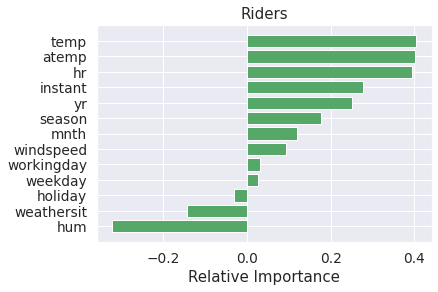

In [186]:
names=['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
plt.title('Riders')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [187]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.2:
        print(names[i])

instant
yr
hr
temp
atemp
hum


In [190]:
df4 = pd.read_csv("hour.csv")
no_riders = tuple(range(0))
low = tuple(range(1, 50, 1))
med = tuple(range(50, 600, 1))
high = tuple(range(600, 1000000, 1))
# Defineing peramiters names
def filter_riders(platform):
    if platform in no_riders:
        return '0'
    elif platform in low:
        return '1'
    elif platform in med:
        return '2'
    else:
        return '3'

df4['cnt'].apply(filter_riders)
df4['riders'] = df4['cnt'].apply(filter_riders)
df4 = df4.drop(columns = ["cnt"])
df4 = df4.drop(columns = ["dteday"])
df4 = df4[['instant','yr','hr','atemp','riders']]
# Defining Data into X1,y1
X1 = np.array(df4.iloc[:,0:3])
y1 = np.array(df4['riders'])

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size= 0.3, random_state =42)

In [191]:
# Decision Tree Classifier 4
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf1 = DecisionTreeClassifier().fit(X1_train, y1_train)
print('Accuracy of Decision tree 4 classifier on training set: {:.2f}'.format(clf1.score(X1_train, y1_train)))
print('Accuracy of Decision tree 4 classifier on test set: {:.2f}' .format(clf1.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of Decision tree 4 classifier on training set: 1.00
Accuracy of Decision tree 4 classifier on test set: 0.89
Time 1.5012919902801515e-08


In [192]:
# Decision Tree Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = clf1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1213  227    0]
 [ 223 3313   58]
 [   1   51  128]]
              precision    recall  f1-score   support

           1       0.84      0.84      0.84      1440
           2       0.92      0.92      0.92      3594
           3       0.69      0.71      0.70       180

    accuracy                           0.89      5214
   macro avg       0.82      0.83      0.82      5214
weighted avg       0.89      0.89      0.89      5214



In [193]:
# KNN 4
# Takes a long time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)
print('Accuracy of K-NN 4 classifier on training set: {:.2f}'.format(knn1.score(X1_train,y1_train)))
print('Accuracy of K-NN 4 classifier on test set: {:.2f}'.format(knn1.score(X1_test,y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of K-NN 4 classifier on training set: 0.90
Accuracy of K-NN 4 classifier on test set: 0.81
Time 1.5925616025924684e-08


In [194]:
# KNN Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = knn1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1009  431    0]
 [ 392 3178   24]
 [   2  156   22]]
              precision    recall  f1-score   support

           1       0.72      0.70      0.71      1440
           2       0.84      0.88      0.86      3594
           3       0.48      0.12      0.19       180

    accuracy                           0.81      5214
   macro avg       0.68      0.57      0.59      5214
weighted avg       0.80      0.81      0.80      5214



In [195]:
#SVM 4
from sklearn.svm import SVC
svm1= SVC(gamma= 'scale')
svm1.fit(X1_train, y1_train)
print('Accuracy of SVM 4 classifier on training set: {:.2f}'.format(svm1.score(X1_train, y1_train)))
print('Accuracy of SVM 4 classifier on test set: {:.2f}'.format(svm1.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of SVM 4 classifier on training set: 0.68
Accuracy of SVM 4 classifier on test set: 0.69
Time 1.7099082469940185e-08


In [196]:
# SVM Classification and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred1 = svm1.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[   0 1440    0]
 [   0 3594    0]
 [   0  180    0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1440
           2       0.69      1.00      0.82      3594
           3       0.00      0.00      0.00       180

    accuracy                           0.69      5214
   macro avg       0.23      0.33      0.27      5214
weighted avg       0.48      0.69      0.56      5214



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
# Naive Bayes 4
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X1_train, y1_train).predict(X1_test)
print('Accuracy of naive bayes 4 classifier on training set: {:.2f}'.format(gnb.score(X1_train, y1_train)))
print('Accuracy of naive bayes 4 classifier on test set: {:.2f}'.format(gnb.score(X1_test, y1_test)))
elapsed_time = timeit.timeit( number=100)/100
print('Time',elapsed_time)

Accuracy of naive bayes 4 classifier on training set: 0.83
Accuracy of naive bayes 4 classifier on test set: 0.83
Time 1.6978010535240174e-08


In [198]:
# Naive Bayes Classification and Confusion matrix
pred1 = gnb.predict(X1_test)
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[1111  328    1]
 [ 281 3181  132]
 [   0  145   35]]
              precision    recall  f1-score   support

           1       0.80      0.77      0.78      1440
           2       0.87      0.89      0.88      3594
           3       0.21      0.19      0.20       180

    accuracy                           0.83      5214
   macro avg       0.63      0.62      0.62      5214
weighted avg       0.83      0.83      0.83      5214

